In [3]:
import numpy as np
import torch
import torch.nn as nn


In [1]:
import sys
print(sys.executable)

/home/yohan/anaconda3/envs/TSL/bin/python


In [7]:
from models import PITS
from layers.PITS_backbone import PITS_backbone
from layers.PITS_layers import *

In [8]:
# Exchange_rate 입력 예시

import pandas as pd

exchange_rate_path = './dataset/exchange_rate.csv'

df_exchange = pd.read_csv(exchange_rate_path)



In [10]:
df_exchange = df_exchange.drop(columns=['date'])

In [11]:
df_exchange

,0,1,2,3,4,5,6,OT
0,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.525486,0.593000
1,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.523972,0.594000
2,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.526316,0.597300
3,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.523834,0.597000
4,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.527426,0.598500
...,...,...,...,...,...,...,...,...
7583,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.688565,0.690846
7584,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.690288,0.695701
7585,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.691419,0.695943
7586,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.690942,0.692689


In [12]:
df_exchange_3d = []
for j in range(int(len(df_exchange)*0.7)):
    df_exchange_3d.append(df_exchange.iloc[j:j+96])

In [25]:
# normalize
from sklearn.preprocessing import StandardScaler


In [14]:
df_exchange_3d = torch.Tensor(np.array(df_exchange_3d))

In [16]:
df_exchange_3d.shape

torch.Size([5311, 96, 8])

In [17]:
# PITS_backbone 정의
# c_in, context_window, traget_window, patch_len, stride, d_model
pits_backbone_sample = PITS_backbone(8, 96, 96, 16, 8, 128)

In [18]:
pits_backbone_sample.train()

PITS_backbone(
  (revin_layer): RevIN()
  (backbone): FC2Encoder(
    (act): ReLU(inplace=True)
    (W_P1): Linear(in_features=16, out_features=128, bias=True)
    (W_P2): Linear(in_features=128, out_features=128, bias=True)
  )
  (head): Flatten_Head(
    (flatten): Flatten(start_dim=-2, end_dim=-1)
    (linear): Linear(in_features=1408, out_features=96, bias=True)
    (dropout): Dropout(p=0, inplace=False)
  )
)

In [20]:
output = pits_backbone_sample(df_exchange_3d[:16].permute(0,2,1))

In [22]:
output.shape

torch.Size([16, 8, 96])

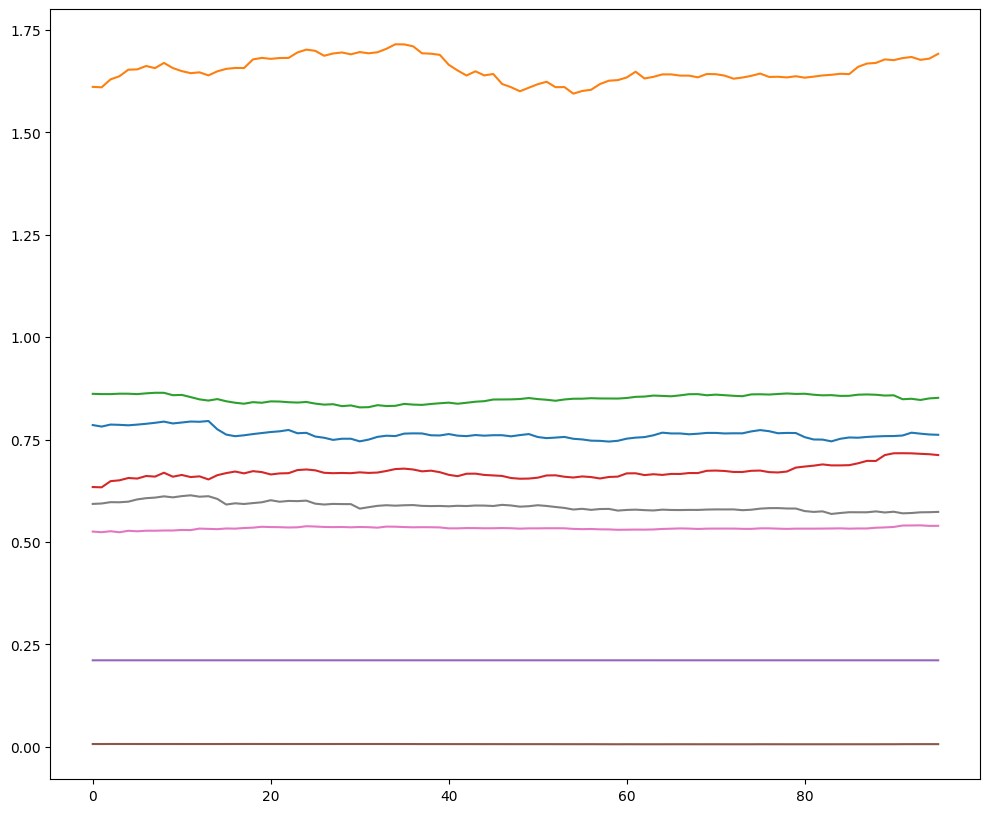

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))
for t in range(8):
    y = df_exchange_3d[0, :, t]
    plt.plot(range(96), y)

plt.show()

In [27]:
patch_0 = df_exchange_3d[:16].permute(0,2,1)

patch_00 = patch_0.unfold(dimension=-1, size=16, step=8)

In [28]:
patch_00.shape

torch.Size([16, 8, 11, 16])

In [29]:
patch_00 = patch_00.permute(0,3,1,2) # [16, 16, 8, 11]

patch_00 = patch_00.transpose(1,2) # [16, 8, 16, 11]

print(patch_00.shape)


torch.Size([16, 8, 16, 11])

In [30]:
patch_00 = patch_00.permute(0,1,3,2)
patch_00.shape

torch.Size([16, 8, 11, 16])

In [31]:
#flatten test

list_sample = [[1,2,3], [4,5,6]]
torch_sample = torch.Tensor(list_sample)
flatten_func = nn.Flatten(start_dim=-2)
print(flatten_func(torch_sample))